# Install Required Libraries for spotify

In [ ]:
pip install requests pandas spotipy beautifulsoup4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.5 MB/s eta 0:00:00


# Authenticate with Spotify

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotify authentication
CLIENT_ID = 'ad439884a7db417ea25fbc87e99d3642'
CLIENT_SECRET = '07d349ae57484fbdba278cdd4d3e237e'

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


# Fetch BTS Song Metadata: Use the Spotify API to search for BTS songs and collect relevant metadata.

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from IPython.display import display
from datetime import datetime

# Set your client ID and client secret
client_id = 'YOUR_CLIENT_ID'        # Replace with your Client ID
client_secret = 'YOUR_CLIENT_SECRET'  # Replace with your Client Secret

# Authenticate
credentials = SpotifyClientCredentials(client_id='ad439884a7db417ea25fbc87e99d3642', client_secret='07d349ae57484fbdba278cdd4d3e237e')
sp = spotipy.Spotify(client_credentials_manager=credentials)

# Search for BTS songs
results = sp.search(q='BTS', type='track', limit=50)  # Adjust the limit as needed

# Extract metadata
bts_songs = []
for track in results['tracks']['items']:
    song_data = {
        'name': track['name'],
        'artists': [artist['name'] for artist in track['artists']],
        'album': track['album']['name'],
        'release_date': track['album']['release_date'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms'],
        'url': track['external_urls']['spotify'],
    }
    bts_songs.append(song_data)

# Create a DataFrame
bts_songs_df = pd.DataFrame(bts_songs)

# Add extra features
bts_songs_df['release_year'] = pd.to_datetime(bts_songs_df['release_date']).dt.year
bts_songs_df['artist_count'] = bts_songs_df['artists'].apply(len)
current_year = datetime.now().year
bts_songs_df['track_age'] = current_year - bts_songs_df['release_year']

# Retrieve Audio Features
def get_audio_features(track_id):
    features = sp.audio_features(track_id)[0]
    if features is not None:
        return {
            'danceability': features.get('danceability', 0),
            'energy': features.get('energy', 0),
            'valence': features.get('valence', 0),
            'tempo': features.get('tempo', 0),
            'loudness': features.get('loudness', 0),
        }
    return {
        'danceability': None,
        'energy': None,
        'valence': None,
        'tempo': None,
        'loudness': None,
    }

# Add audio features to DataFrame
audio_features = []
for track in results['tracks']['items']:
    audio_feature_data = get_audio_features(track['id'])
    audio_features.append(audio_feature_data)

# Create a DataFrame for audio features and concatenate with existing DataFrame
audio_features_df = pd.DataFrame(audio_features)
bts_songs_df = pd.concat([bts_songs_df, audio_features_df], axis=1)

# Export the DataFrame to a CSV file
output_file = 'bts_songs.csv'
bts_songs_df.to_csv(output_file, index=False)

# Fill NaN values with zeros (optional)
bts_songs_df.fillna(0, inplace=True)
bts_songs_df.index = bts_songs_df.index + 1
# Display the updated DataFrame
display(bts_songs_df)


,name,artists,album,release_date,popularity,duration_ms,url,release_year,artist_count,track_age,danceability,energy,valence,tempo,loudness
1,Butter,[BTS],"Butter (Hotter, Sweeter, Cooler)",2021-06-04,65,164441,https://open.spotify.com/track/1mWdTewIgB3gtBM...,2021,1,3,0.759,0.459,0.695,109.997,-5.187
2,Neva Play (feat. RM of BTS),"[Megan Thee Stallion, RM]",Neva Play (feat. RM of BTS),2024-09-06,83,157173,https://open.spotify.com/track/2ZqTbIID9vFPTXa...,2024,2,0,0.826,0.756,0.794,160.010,-4.984
3,Dynamite,[BTS],BE,2020-11-20,78,199053,https://open.spotify.com/track/5QDLhrAOJJdNAmC...,2020,1,4,0.746,0.765,0.737,114.044,-4.410
4,Run BTS,[BTS],Proof,2022-06-10,73,204939,https://open.spotify.com/track/69xohKu8C1fsflY...,2022,1,2,0.724,0.818,0.696,77.004,-3.747
5,FAKE LOVE,[BTS],Love Yourself 轉 'Tear',2018-05-18,73,242333,https://open.spotify.com/track/6m1TWFMeon7ai9X...,2018,1,6,0.557,0.719,0.345,77.502,-4.515
6,BTS Cypher Pt.3: Killer,"[BTS, Supreme Boi]",Dark & Wild,2014-08-20,59,267782,https://open.spotify.com/track/5OlieB5VdsOMuBu...,2014,2,10,0.793,0.924,0.665,140.031,-3.017
7,Boy With Luv (feat. Halsey),"[BTS, Halsey]",MAP OF THE SOUL : PERSONA,2019-04-12,73,229773,https://open.spotify.com/track/4a9tbd947vo9K8V...,2019,2,5,0.645,0.862,0.803,119.947,-4.761
8,BTS Cypher 4,[BTS],Wings,2016-10-10,59,294463,https://open.spotify.com/track/4cTSnpyaIR1qGaT...,2016,1,8,0.817,0.797,0.361,119.978,-4.395
9,IDOL,[BTS],Love Yourself 結 'Answer',2018-08-24,69,222732,https://open.spotify.com/track/1e8J3XClxZbFmvI...,2018,1,6,0.733,0.855,0.420,126.035,-3.211
10,Left and Right (Feat. Jung Kook of BTS),"[Charlie Puth, Jung Kook, BTS]",CHARLIE,2022-10-06,75,154486,https://open.spotify.com/track/5Odq8ohlgIbQKMZ...,2022,3,2,0.881,0.592,0.719,101.058,-4.898


# Data Analysis

1. Data Cleaning

In [ ]:
# Check for missing values
print(bts_songs_df.isnull().sum())


name            0
artists         0
album           0
release_date    0
popularity      0
duration_ms     0
url             0
release_year    0
artist_count    0
track_age       0
danceability    0
energy          0
valence         0
tempo           0
loudness        0
dtype: int64


2. Descriptive Statistics

In [ ]:
import pandas as pd

# Get descriptive statistics
desc_stats = bts_songs_df.describe()

# Reset index and add 1 to each index
desc_stats_reset = desc_stats.reset_index()
desc_stats_reset.index = desc_stats_reset.index + 1  # Start indexing from 1

# Display the descriptive statistics in table format
print(desc_stats_reset)


   index  popularity    duration_ms  release_year  artist_count  track_age  \
1  count   50.000000      50.000000     50.000000     50.000000  50.000000   
2   mean   63.460000  215858.100000   2018.400000      1.360000   5.600000   
3    std   15.000966   39048.948066      3.251373      0.631163   3.251373   
4    min    0.000000  131192.000000   2011.000000      1.000000   0.000000   
5    25%   62.250000  197147.000000   2016.000000      1.000000   3.000000   
6    50%   66.000000  222927.000000   2018.000000      1.000000   6.000000   
7    75%   71.000000  237831.750000   2021.000000      2.000000   8.000000   
8    max   84.000000  307675.000000   2024.000000      3.000000  13.000000   

   danceability     energy    valence       tempo   loudness  
1     50.000000  50.000000  50.000000   50.000000  50.000000  
2      0.638100   0.742700   0.574140  119.325980  -4.212800  
3      0.173401   0.196248   0.198737   35.407848   1.440314  
4      0.000000   0.000000   0.000000    0.00

3. Data Grouping

In [ ]:
# Average popularity by album
average_popularity = bts_songs_df.groupby('album')['popularity'].mean().reset_index()

# Sort in descending order
average_popularity = average_popularity.sort_values(by='popularity', ascending=False)

# Reset the index and start from 1
average_popularity.reset_index(drop=True, inplace=True)
average_popularity.index += 1  # Start index from 1

# Print the result in a structured format
print(average_popularity.to_string(index=True))


                                               album  popularity
1                        Neva Play (feat. RM of BTS)   79.500000
2                                                 BE   75.000000
3                                            CHARLIE   75.000000
4                               Music Of The Spheres   74.000000
5                                        My Universe   74.000000
6                                Permission to Dance   71.000000
7                               You Never Walk Alone   71.000000
8                          MAP OF THE SOUL : PERSONA   69.500000
9            Left and Right (Feat. Jung Kook of BTS)   69.000000
10                            Love Yourself 轉 'Tear'   69.000000
11                               MAP OF THE SOUL : 7   68.000000
12                          Love Yourself 結 'Answer'   67.000000
13                                             Proof   65.666667
14            The Most Beautiful Moment in Life Pt.1   65.500000
15             Bad Decisi

# Data visualization

<ipython-input-87-379cbd9569f3>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # Use seaborn style with a light background


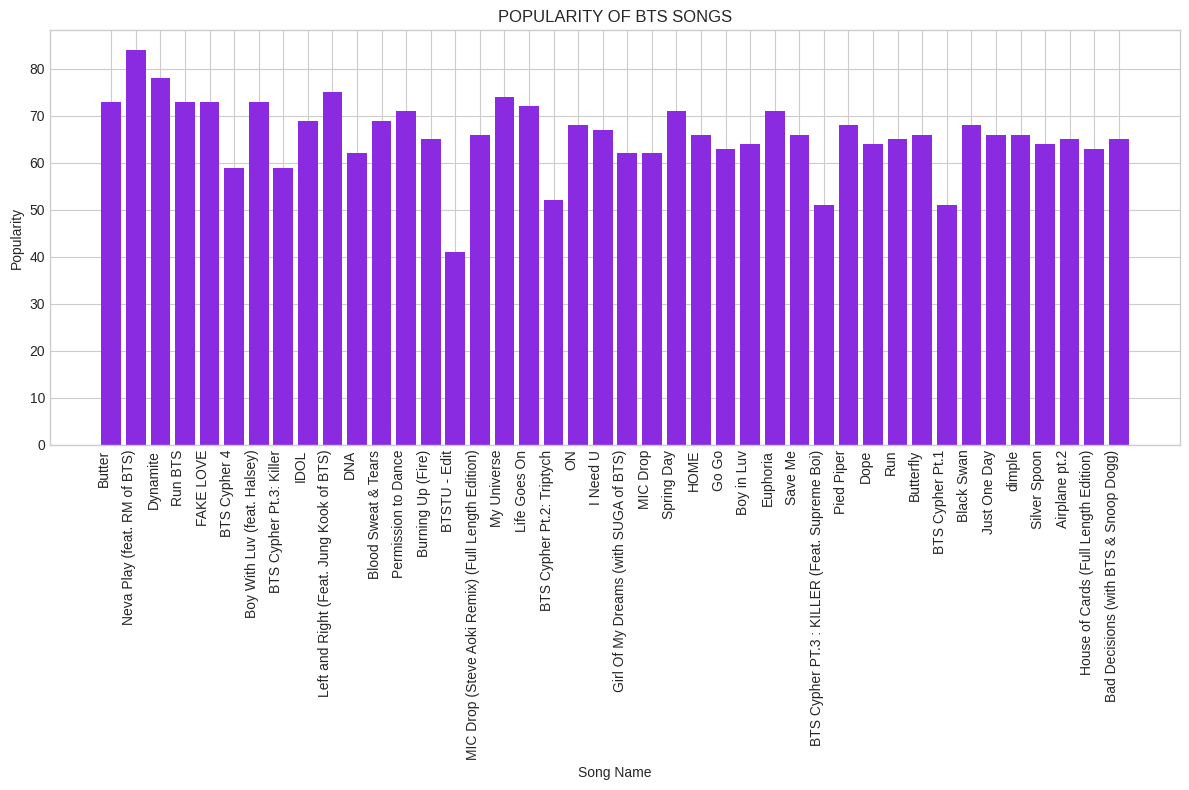

In [ ]:
#1. Bar Chart for Popularity by Song
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')  # Use seaborn style with a light background
# Set the figure size
plt.figure(figsize=(12, 8))
# Vertical bar chart for song popularity
plt.bar(bts_songs_df['name'], bts_songs_df['popularity'], color='#8A2BE2')
plt.xlabel('Song Name')
plt.ylabel('Popularity')
plt.title('POPULARITY OF BTS SONGS')
plt.xticks(rotation=90, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()



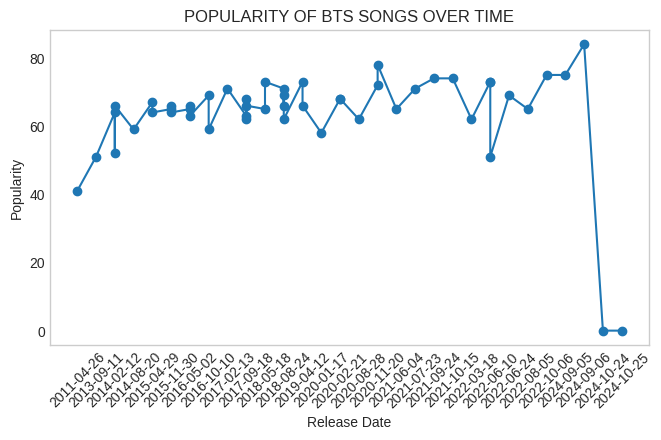

In [ ]:
# 2. Line Chart for Popularity Over Time
plt.figure(figsize=(17, 9))
plt.subplot(2, 2, 3)
bts_songs_df.sort_values('release_date', inplace=True)
plt.plot(bts_songs_df['release_date'], bts_songs_df['popularity'], marker='o', linestyle='-')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('POPULARITY OF BTS SONGS OVER TIME')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid()

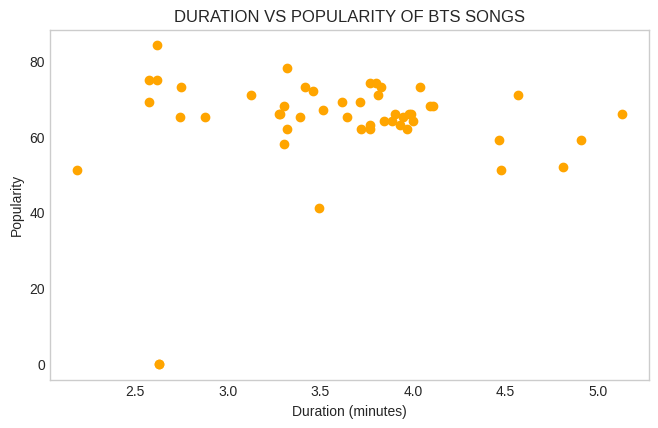

In [ ]:
# 3. Scatter Plot for Duration vs. Popularity
plt.figure(figsize=(17, 10))
plt.subplot(2, 2, 4)
bts_songs_df['duration_min'] = bts_songs_df['duration_ms'] / (1000 * 60)  # Convert milliseconds to minutes
plt.scatter(bts_songs_df['duration_min'], bts_songs_df['popularity'], color='orange')
plt.title('DURATION VS POPULARITY OF BTS SONGS')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid()

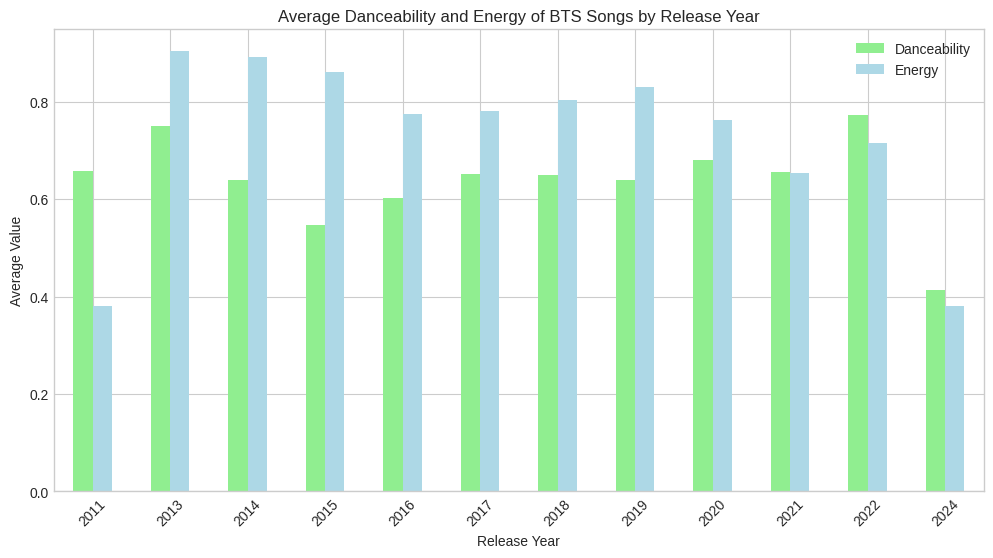

In [ ]:
#4. Release Year Analysis
def release_year_analysis(df):
    avg_features_by_year = df.groupby('release_year')[['danceability', 'energy']].mean()
    avg_features_by_year.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'lightblue'])
    plt.title('Average Danceability and Energy of BTS Songs by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.legend(['Danceability', 'Energy'])
    plt.show()

release_year_analysis(bts_songs_df)


The release year analysis reveals trends in BTS's music style regarding average danceability and energy over time. Increases or decreases in these features can indicate shifts in their musical direction, reflecting the impact of specific albums or events on their sound. Consistent values suggest stability in their style, while fluctuations may indicate experimentation with new genres.

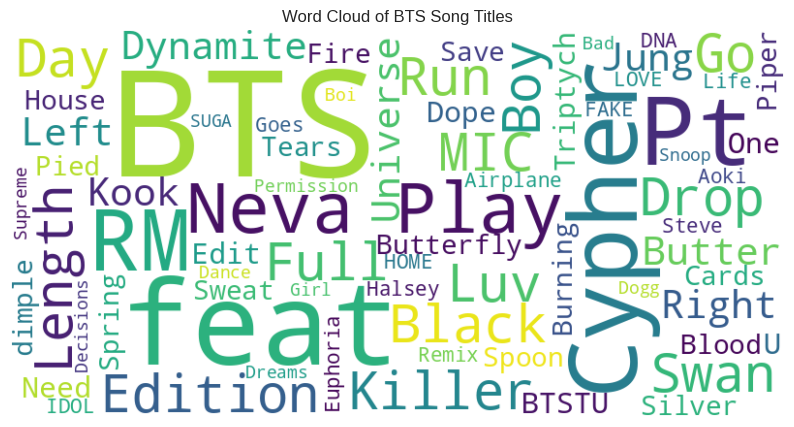

In [ ]:
#Word Cloud of Song Titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate text from song titles
text = ' '.join(bts_songs_df['name'].tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of BTS Song Titles')
plt.show()


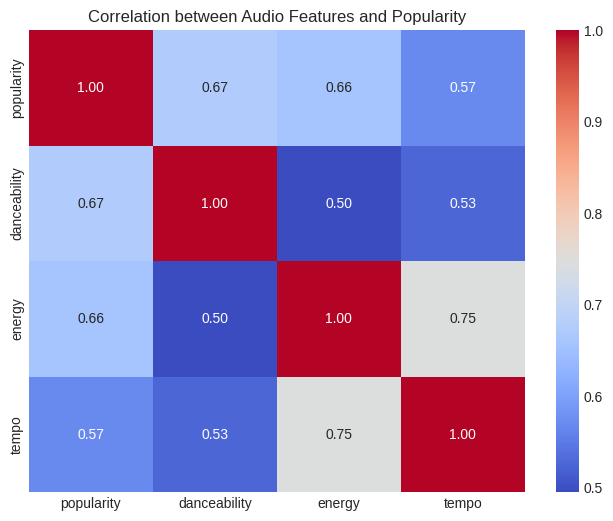

In [ ]:
#5. Heatmap for Correlation Analysis
import seaborn as sns

def correlation_analysis(df):
    correlation = df[['popularity', 'danceability', 'energy', 'tempo']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation between Audio Features and Popularity')
    plt.show()

correlation_analysis(bts_songs_df)


<ipython-input-82-488f4914a089>:46: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  plt.tight_layout()
<ipython-input-82-488f4914a089>:46: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  plt.tight_layout()
<ipython-input-82-488f4914a089>:46: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36681 (\N{CJK UNIFIED IDEOGRAPH-8F49}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25215 (\N{CJK UNIFIED IDEOGRAPH-627F}) missing from current font.
  fig.canvas.print_

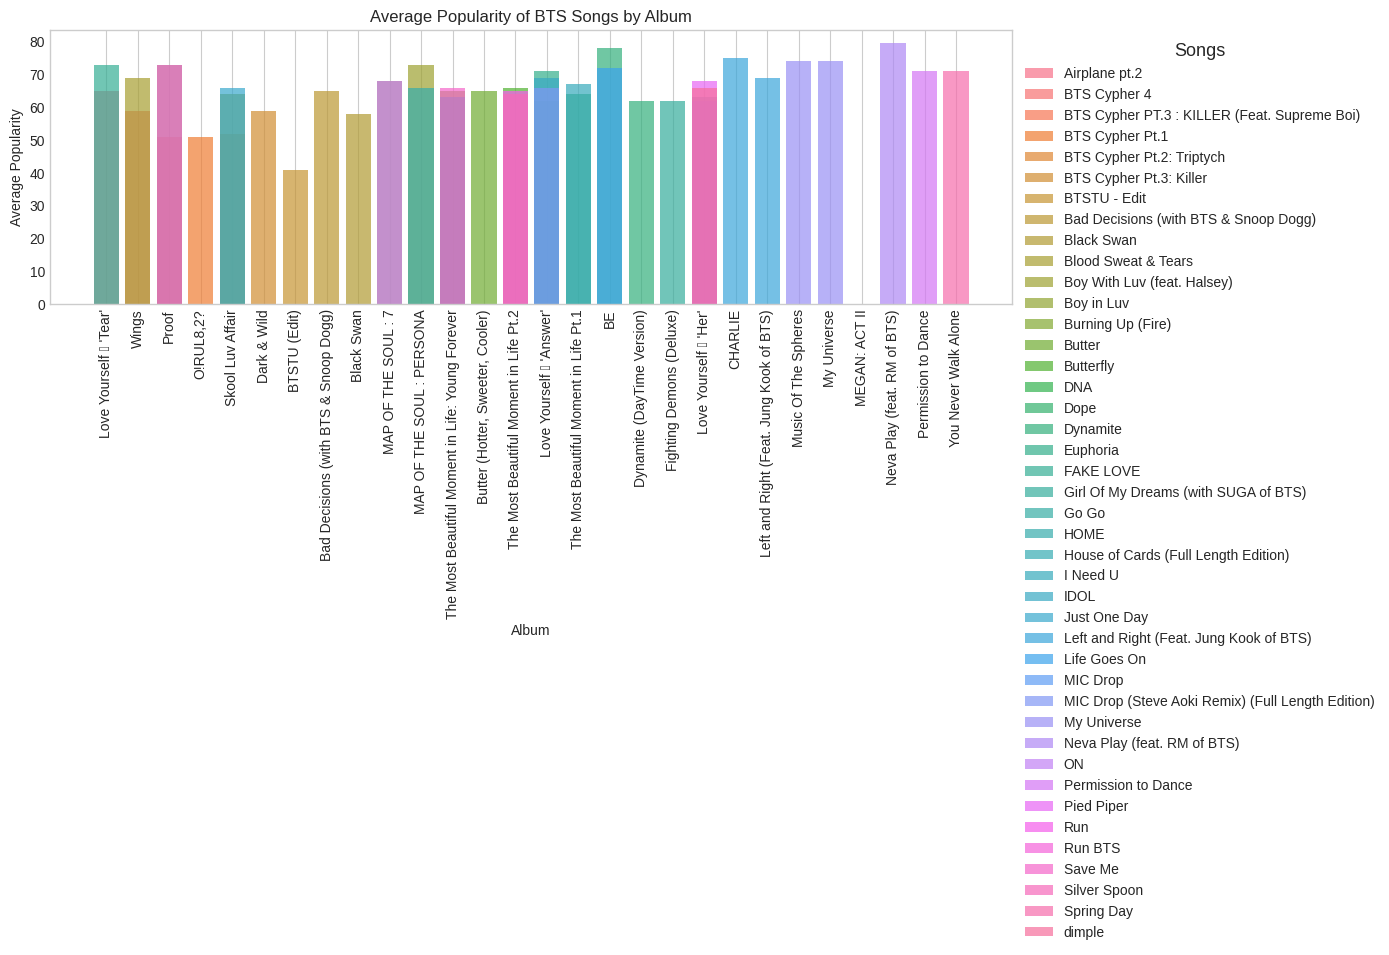

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by song name and album, then calculate the average popularity
avg_popularity = bts_songs_df.groupby(['name', 'album'])['popularity'].mean().reset_index()

# Create a mapping of songs to colors
unique_songs = avg_popularity['name'].unique()
colors = sns.color_palette("husl", len(unique_songs))  # Generate distinct colors
song_color_map = dict(zip(unique_songs, colors))  # Create a mapping of songs to colors

# Create a combined label for each song-album combination
avg_popularity['label'] = avg_popularity['name'] + ' - ' + avg_popularity['album']

# Plotting
plt.figure(figsize=(14, 7))

# Iterate over each unique song
for song in unique_songs:
    subset = avg_popularity[avg_popularity['name'] == song]
    plt.bar(subset['album'], subset['popularity'],
            label=song,
            color=song_color_map[song],
            alpha=0.7)

# Customize the plot
plt.title('Average Popularity of BTS Songs by Album')
plt.ylabel('Average Popularity')
plt.xlabel('Album')
plt.xticks(rotation=90)

# Create custom legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(by_label.values(), by_label.keys(), title='Songs', loc='upper left', bbox_to_anchor=(1, 1), title_fontsize='13')

plt.tight_layout()
plt.grid(axis='y')
plt.show()
